# Goals 

The goal of this part of the tutorial is build your skills in: 
   - Asking good questions 
   - Working with data
   - Exploratory Data Analysis
   - Learn about a few types of regression
       - Linear regression
       - Logistic regression 
       - Lasso regularization 
       - Ridge regularization 
   - Fit a model 
   - Evaluate the model, using accuracy and ROC 
   - Predicting whether a movie will win an Oscar

## We're going to make an award winning movie! 

In the last section, we wanted to explore what movie features would make us a huge pile of money. But now, we have moved on from our desire for earthly goods like money. We have moved on to more nobel goals like  <span>**FAME & ETERNAL GLORY**</span>!! To cement our place in the history books, we need to figure out how to make a movie that will win an [Academy Award aka Oscar](https://en.wikipedia.org/wiki/Academy_Awards)!!  

<img src="https://cbsnews2.cbsistatic.com/hub/i/r/2014/03/03/63e74ae4-8175-4c17-b2c6-930f945fc2e9/thumbnail/620x350/7a32fdb6196986fcd86888fc40a1f6d7/476261125.jpg"
     alt="Oscars"
     style="align: center"/>



# Ask a good question 

Given our new life outlook and a dataset that includes all of the information we could want about every movie ever made, including those that had won Oscars, what kind of questions are we trying to get the data to answer? 

### Try it out! 

Come up with some questions that you would like the answers to. Discuss with your group, and be prepared to share your answers.  

*your answer here*

# Finding good data (& revising your questions)

<img src="http://www.clker.com/cliparts/h/3/h/f/L/d/red-light-bulb.svg"
     alt="red alert"
     style="align: center"/>

Uh oh! We have some late breaking news about our data source! While we were planning on getting all of the information for every movie from IMDPy, that turned out to be (a) way too many movies, and (b) way to slow.  

We still need to find some features that could increase the likelihood that we will win an Academy Award, and all we have is this spreadsheet with some data features for all the movies nominated for an Academy Award from 1981 - 2005. ** What do we do? Is there any way we can salvage this situation?**

*your answer here*

# Exploratory Data Analysis

So we have this spreadsheet that we dumped into a Pandas DataFrame. Let's take a look at it and see what we can learn about it! 

In [24]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import cPickle as pickle
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import sklearn.metrics as metrics

from collections import defaultdict
from datetime import datetime

import io
import time
import math
import operator

In [25]:
# Load dict of Oscar nominated movies and convert to DataFrame
AAdf_complete = pd.DataFrame.from_dict(pickle.load(open('AAdict_complete.p','rb'))).transpose()

In [26]:
# Load dataframe of Oscar nominated movies minus outcomes 
pickle.dump(dftouse, open('AAdict.p','wb'))
AAdf = pd.DataFrame.from_dict(pickle.load(open('AAdict.p','rb')))

Print the first few rows of the dataframe. 

In [27]:
# your code here 
AAdf.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,France,Germany,History,Horror,Italy,Music,Musical,Mystery,News,Nominated Best Actor,Nominated Best Actress,Nominated Best Animated Feature Film,Nominated Best Art Direction,Nominated Best Cinematography,Nominated Best Costume Design,Nominated Best Director,"Nominated Best Documentary, Feature","Nominated Best Documentary, Short Subject",Nominated Best Film Editing,Nominated Best Foreign Language Film,Nominated Best Makeup,"Nominated Best Music, Adaptation / Original Song Score","Nominated Best Music, Dramatic Score","Nominated Best Music, Musical or Comedy Score","Nominated Best Music, Original Score","Nominated Best Music, Song",Nominated Best Picture,"Nominated Best Short Film, Animated","Nominated Best Short Film, Live Action",Nominated Best Sound,Nominated Best Sound Editing,Nominated Best Sound Effects Editing,Nominated Best Sound Mixing,Nominated Best Supporting Actor,Nominated Best Supporting Actress,Nominated Best Visual Effects,"Nominated Best Writing, Adapted Screenplay","Nominated Best Writing, Original Screenplay",Nominated Special Achievement Award,OtherCountry/Unknown,Romance,Sci-Fi,Short,Spain,Sport,Thriller,USA,War,Western,based-on-novel,blockbuster,blood,character-name-in-title,cigarette-smoking,cult-film,dancing,death,family-relationships,father-daughter-relationship,father-son-relationship,female-nudity,flashback,friendship,husband-wife-relationship,independent-film,love,marriage,month,mother-daughter-relationship,mother-son-relationship,mpaaint,murder,numnominations,quarter,runtime,sex,singing,title-spoken-by-character,violence,winner,year
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,"""Until"": Sting (Music & Lyric)",False,False,False,False,False,False,False,False,False,False,False,False,False,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,12,0,0,2,0,1,4,118,0,0,0,0,0,2001
1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,Burt Lancaster,Susan Sarandon,False,False,False,False,Louis Malle,False,False,False,False,False,False,False,False,False,False,"Denis Heroux, John Kemeny (Producers)",False,False,False,False,False,False,False,False,False,False,John Guare,False,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,1,5,2,104,0,0,1,0,0,1981
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,Tambi Larsen (Art Direction); Jim Berkey (Set ...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,11,0,0,0,1,1,4,149,0,0,0,1,0,1981
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Paul Newman,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Melinda Dillon,False,False,Kurt Luedtke,False,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,1,3,4,116,0,0,1,0,0,1981
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,"Suzanne Bauman, Paul Neshamkin, Jim Burroughs ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,60,0,0,0,0,0,1981


What shape is the dataframe? 

In [28]:
# your code here
print(AAdf.shape)

(1364, 91)


Print all of the dataframe's column headers. 

In [29]:
# your code here
AAdf.columns

Index([                                                u'Action',                                              u'Adventure',                                              u'Animation',                                              u'Biography',                                                 u'Comedy',                                                  u'Crime',                                            u'Documentary',                                                  u'Drama',
                                                       u'Family',                                                u'Fantasy',                                                 u'France',                                                u'Germany',                                                u'History',                                                 u'Horror',                                                  u'Italy',                                                  u'Music',
                                          

You might notice that some of these variables are *continuous* while some are *categorical*. It can be helpful to look at these separately, so we make lists of indices, so that we can access these separately. 

In [30]:
# write selectors for categorical or continuous variables
CONTINUOUS = set(['month','mpaaint','numnominations','quarter','runtime'])

CATEGORICAL = set(list(AAdf.columns)) - set(CONTINUOUS)
CATEGORICAL.remove(u'winner')
CATEGORICAL.remove('year')

Now, we will use exploratory data analysis to answer a few questions: 
    
1. Do some countries tend to win more Oscars? 
2. What is the frequency of the top 25 keywords among Oscar winners
3. What genres tend to win Oscars
4. In what month are Oscar Winners released? 

To do this, we start by making a list of the genres, countries, and keywords in our dataset. 

In [21]:
%%time
# Get list of unique countries, genres, keywords
# Will be used to create barcharts
genreslist = set()
countries_dict = {}
keywords_dict = {}
for _,movie in AAdf_complete.iterrows():
    for genre in movie.genres:
        genreslist.add(genre)
    if type(movie.countrylist) == list:
        for country in movie.countrylist:
            if country in countries_dict.keys():
                countries_dict[str(country)] += 1
            else:
                countries_dict[str(country)] = 1
    if type(movie.keywords) == list:
        for keyword in movie.keywords:
            if keyword in keywords_dict.keys():
                keywords_dict[keyword] += 1
            else:
                keywords_dict[keyword] = 1
genreslist.remove('Talk-Show')

# shorten countries and keywords dictionary to only 
# most common keywords to reduce dimensionality
numother = 0
for country in countries_dict.keys():
    if countries_dict[country] <= 10:
        numother = numother + countries_dict[country]
        del countries_dict[country]
countries_dict['OtherCountry/Unknown'] = numother
for keyword in keywords_dict.keys():
    if keywords_dict[keyword] <= 200:
        del keywords_dict[keyword]

CPU times: user 2min 39s, sys: 1.2 s, total: 2min 41s
Wall time: 2min 43s


In [23]:
genres_list = pickle.load(io.open('genres_list.p', 'rb'))
keywords_dict = pickle.load(io.open('keywords_dict.p', 'rb'))
countries_dict = pickle.load(io.open('countries_dict.p', 'rb'))

### Countries with the most winners per nominee 

In [31]:
# Create dictionary of countries ratio (winner/total)
countries_dict_ratio = {}
countries_dict_ratiosd = {}
for country in countries_dict.keys():
    countries_dict_ratio[country] = sum(AAdf[AAdf['winner']==1][country]) / float(countries_dict[country])
    countries_dict_ratiosd[country] = np.sqrt((countries_dict_ratio[country] * (1 - countries_dict_ratio[country])) / countries_dict[country])
# Sort countries in order by ratio
sorted_countries = sorted(countries_dict_ratio.items(), key=operator.itemgetter(1))

xerr = []
for key in sorted_countries:
    xerr.append(countries_dict_ratiosd[key[0]])

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


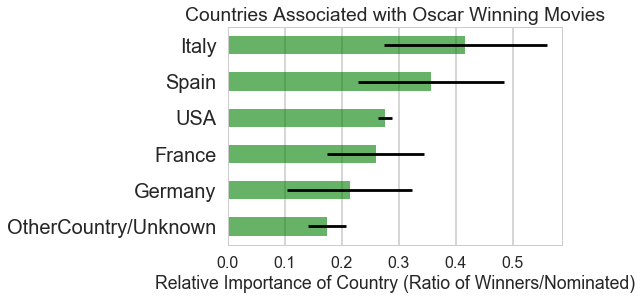

In [32]:
# Make your your plot beautiful!
loc1 = [0.5,1.5,2.5,3.5,4.5,5.5]
fig, ax = plt.subplots()
ax.barh(bottom=loc1,width=zip(*sorted_countries)[1],height=0.5, color='g', alpha = .6, align='center', xerr=xerr)
ax.set_ylim(0,6)
ax.set_yticks(loc1)
ax.set_yticklabels(zip(*sorted_countries)[0], size=20)
ax.set_title('Countries Associated with Oscar Winning Movies')
ax.set_xlabel("Relative Importance of Country (Ratio of Winners/Nominated)")
ax.yaxis.grid(False)
ax.legend()
plt.show()

### What are the most poweful plot elements? 

In [39]:
keywords_dict_ratio = {}
keywords_dict_ratiosd = {}

for keyword in keywords_dict.keys():
    keywords_dict_ratio[keyword] = sum(AAdf[AAdf['winner']==1][keyword]) / float(keywords_dict[keyword])
    keywords_dict_ratiosd[keyword] = np.sqrt((keywords_dict_ratio[keyword] * (1 - keywords_dict_ratio[keyword])) / keywords_dict[keyword])

# sort the movie by ratio
sorted_keywords = sorted(keywords_dict_ratio.items(), key=operator.itemgetter(1))

# calculate error 
xerr = []
for key in sorted_keywords:
    xerr.append(keywords_dict_ratiosd[key[0]])

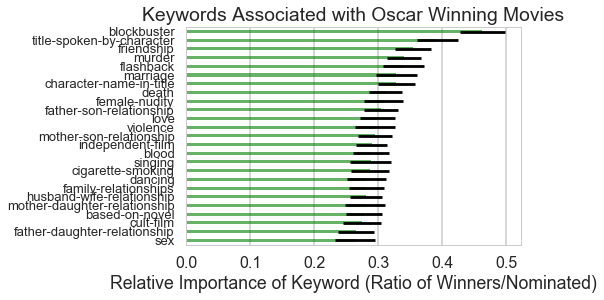

In [40]:
loc1 = range(len(sorted_keywords))
fig, ax = plt.subplots()
ax.barh(loc1,zip(*sorted_keywords)[1], 0.35, color='g', label='loser', alpha = .6, align="center",xerr=xerr)
ax.set_ylim(-0.5,24.5)
ax.set_yticks(np.arange(len(zip(*sorted_keywords)[0])))
ax.set_yticklabels(zip(*sorted_keywords)[0], size=13)
ax.set_title("Keywords Associated with Oscar Winning Movies")
ax.set_xlabel("Relative Importance of Keyword (Ratio of Winners/Nominated)")
ax.yaxis.grid(False)
plt.show()

### Which genres are most common among Oscar winning movies? 

In [41]:
# Create dictionary of genre ratios (winner/total)
genres_dict_ratio = {}
genres_dict_ratiosd = {}
for genre in genreslist:
    genres_dict_ratio[genre] = sum(AAdf[AAdf['winner']==1][genre]) / float(sum(AAdf[genre]))
    genres_dict_ratiosd[genre] = np.sqrt((genres_dict_ratio[genre] * (1 - genres_dict_ratio[genre])) / float(sum(dftouse[genre])))

# sort the movie by ratio
sorted_genres = sorted(genres_dict_ratio.items(), key=operator.itemgetter(1))

# manage the error
xerr = []
for key in sorted_genres:
    sd = genres_dict_ratiosd[key[0]]
    if sd == 0:
        sd = 1
    xerr.append(sd)

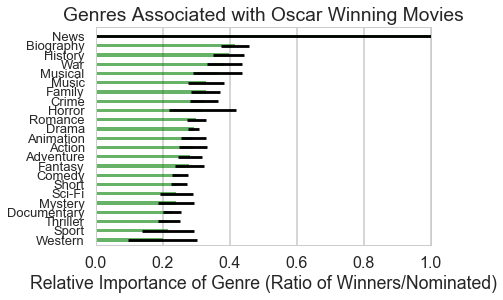

In [38]:
loc1 = range(len(sorted_genres))
fig, ax = plt.subplots()
ax.barh(loc1,zip(*sorted_genres)[1], 0.35, color='g', label='loser', alpha = .6, align='center', xerr=xerr)
ax.set_xlim(0,1)
ax.set_ylim(-0.5,len(zip(*sorted_genres)[0]))
ax.set_yticks(np.arange(len(zip(*sorted_genres)[0])))
ax.set_yticklabels(zip(*sorted_genres)[0], size=13)
ax.set_title("Genres Associated with Oscar Winning Movies")
ax.set_xlabel("Relative Importance of Genre (Ratio of Winners/Nominated)")
ax.yaxis.grid(False)
plt.show()

### When are Oscar winning movies most often released?

In [43]:
month_name_dict = {0:'Unknown',1:'January',2:"Feburary",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
month_dict = {}

for month in range(13):
    month_dict_winner[month_name_dict[month]] = len(AAdf[(AAdf['month']== month) & AAdf['winner']==1])
del month_dict_winner['Unknown']

sorted_month_winners = sorted(month_dict_winner.items(), key=operator.itemgetter(1))

In [44]:
fig, ax = plt.subplots()
ax.barh(loc1, zip(*sorted_month_winners)[1], 0.5, color='g', alpha = .6, align="center")
ax.set_ylim(-0.5,11.5)
ax.set_yticks(np.arange(len(zip(*sorted_month_winners)[1])))
ax.set_yticklabels(zip(*sorted_month_winners)[0], size=14)
ax.set_title('Raw Number of Winners By Month')
ax.yaxis.grid(False)
plt.show()

ValueError: incompatible sizes: argument 'width' must be length 25 or scalar

# Regression 

Selecting an appropriate regression can be harder than it looks. 

<img src="https://imgs.xkcd.com/comics/linear_regression.png"
     alt="https://xkcd.com/1725/"
     style="align: center"/>


## Linear Regression

- Outcome: Continuous 
- Error minimization: [Ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares)
- Large errors are penalized more 
- No regularization 

## Logistic Regression 

- Outcome: Binary 
- Error minimization: [Maximum likelihood](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) 
- All errors are penalized similarly 
- No regularization 

In [ ]:
<img src="https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png"
     alt=""
     style="float: left; margin-right: 100px;"/>

Sometimes you need to deal with problems like [overfitting](https://en.wikipedia.org/wiki/Overfitting), a symptom of high variance, and [underfitting](https://en.wikipedia.org/wiki/Overfitting#Underfitting), a sympton of high bias. 


<img src="https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png"
     alt=""
     style="float: left; margin-right: 100px;"/>


## Regularization methods 

- Normalizes to prevent overfitting 

### Lasso 
- Error minimization: [Least Absolute Shrinkage & Selection Operator (Lasso)](https://en.wikipedia.org/wiki/Lasso_(statistics))

### Ridge

- Error minimization: [Ridge](https://en.wikipedia.org/wiki/Lasso_(statistics))

@help add image 

# Fit models 



# Evaluate model performance 

## Look at accuracy 

One way to evaluate our model is look at its accuracy. For example, if we are classifying movies as Oscar winners or not. What proportion of movies can we correctly identify as Oscar winners? 

## Error Rates 

Confusion matrices are great because they allow us to see what types of errors are model makes! If our model makes systematic errors, we need to know that! It is easiest to think about error rates in the context of a binary confusion matrix. 

<img src="img/binaryconfusionmatrix.png"
     alt="Example Great Movie"
     style="align: center"/>

## Explore your errors

Exploring the types of errors made by your model is super important! I recommend doing at least a simple check whenever you check model accuracy. 

While the internet and our newfound scraping skills can give us a ton of data, to develop good models, we need to consider that data with some skepticism and look at the errors our models make. 

For example, movies makers are notorious for overrepresenting some parts of society while underrepresenting others. While a movie audience is made of 50% women, only 24% of movie leads are women. 68% of all female characters were white in the top 100 films of 2017. 16% were Black, 7% were Asian, 7% were Latina, and 2% were of another race or ethnicity [[Women & Hollywood](https://womenandhollywood.com/resources/statistics/)]. 

This means that if we want to use movie data from previous, we have to be aware that most of the leads and speaking characters are going to have light skin and ~76% of them will be male.

One clear example of how this can go wrong can be demonstrated by facial recognition software. Joy was a graduate student at the MIT Media Lab, working facial detection software, but she had trouble testing her code because the out of the box face detection software never detected her face. To test her code, she had to wear a white mask to be recognized. 
     
Because the training data contained many light-skinned faces, the software was incapable of recognizing faces that deviated from that norm. 

<img src="img/joy.png"
     alt="Bias in ML"
     style="align: center"/>


Putting this in terms of our example: 
   - True Positive = You predicted a movie would get an Oscar, and it did! 
   - True Negative = You predicted a movie would *not* get an Oscar, and it did not get one. 
   - False Positive = You predicted a movie would get an Oscar, and it did *not*.
   - False Negative = You predicted a movie would *not* get an Oscar, but it did. 

## ROC curves 

# Feedback 

We love data, and we are always trying to improve our teaching! That means that we are going to ask you for data about this tutorial. Please take a moment to give us [some feedback](https://docs.google.com/forms/d/e/1FAIpQLScMlcyArrDX8AEJ4UeRkMVHSIdkipzWDTvBS2kbkrVqgJPMxA/viewform)! 